### Session 5 - Text classification with neural networks via ```scikit-learn```

In [22]:
# pip install seaborn, matplot, pandas, scikit-learn

# system tools
import os
import sys
 
# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

# Save models
from joblib import dump, load

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [5]:
# Load the data to pandas csv
filepath = os.path.join(
                        "data",
                        "fake_or_real_news.csv"
                        )

data = pd.read_csv(filepath)

In [8]:
data.sample(10)
data["label"].value_counts() # The dataset is balanced

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [7]:
# Create data variables containing data and labels

X = data["text"]
y = data["label"]

## Train-test split

Looking back at the code from last week, use the ```train_test_split()``` function to create an 80/20 split in the data.

In [9]:
# Add your train/test split code here

X_train, X_test, y_train, y_test = train_test_split(X,                      # X input = text for the model
                                                    y,                      # y input = classification labels
                                                    test_size = 0.2,        # 80/20 split
                                                    random_state = 123)     # Random state for reproducibility

## Vectorizing and Feature Extraction

Next, you want to create a vectorizer object. I suggest the following parameters:

- TfidfVectorizer on unigrams and bigrams;
- make everything lowercase; 
- remove top and bottom 5% of words; 
- keep the top 500 features.

In [11]:
# Create vectorizer object

vectorizer = TfidfVectorizer(ngram_range = (1,2),     # Unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # Make everything lowercase
                             max_df = 0.95,           # Remove very common words
                             min_df = 0.05,           # Remove very rare words
                             max_features = 500)      # Keep only top 500 features

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [13]:
# First, fit to the training data
X_train_features = vectorizer.fit_transform(X_train)

# Then, do it for our test data
X_test_features = vectorizer.transform(X_test)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

__Simple neural network__

We can define simple NN classifiers using the ```MLPClassifier``` class in ```scikit-learn```. I've done that for you here - can you see how it's been put together?

For more information, check out the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [14]:
classifier = MLPClassifier(activation = "logistic",         # Logistic Sigmoid activation function for the hidden layer
                           hidden_layer_sizes = (20,),      # Number of neurons in the ith hidden layer
                           max_iter = 1000,                 # Maximum number of iterations
                           random_state = 123)

In [16]:
# Fit the classifier to the data

fitted_classifier = classifier.fit(X_train_features, y_train)

__Get predictions__

We want to use our trained model to get predicted labels on our test data.

In [18]:
# Get predictions
y_pred = fitted_classifier.predict(X_test_features)
print(y_pred[:10]) # Print first 10 examples of the predictions

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL']


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

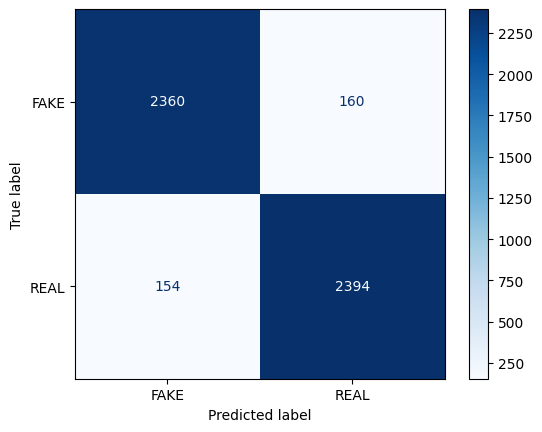

In [19]:
# Use confusion matrix to check performance

metrics.ConfusionMatrixDisplay.from_estimator(fitted_classifier,           # The classifier name
                                                X_train_features,          # The training features
                                                y_train,                   # The training labels
                                                cmap = plt.cm.Blues,       # Colours prettier
                                                labels = ["FAKE", "REAL"]) # Labels

__Calculating metrics__

We can use the same built-in classification report from ```scikit-learn``` to get the classification report for our model.

In [20]:
# Get classification report

classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       644
        REAL       0.90      0.88      0.89       623

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



__Plotting loss curves__

If our model is learning well, we should see a smooth, steep downwards slope which tapers off towards a plateau. 

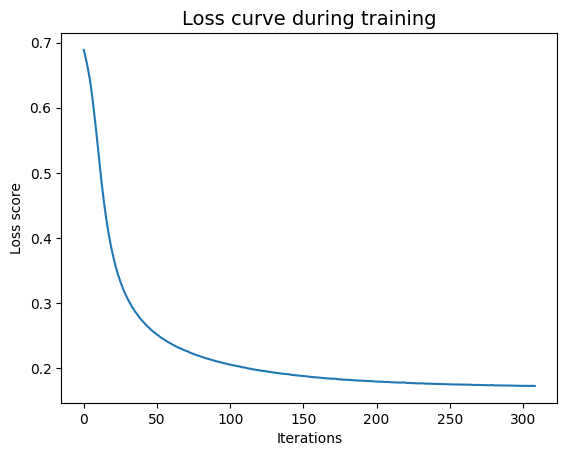

In [21]:
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize = 14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

## Save models

As last week, it's possible to save an ```MLPClassifier``` model for later use using the library ```joblib```.

In [24]:
dump(fitted_classifier, "MLP_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [10]:
from joblib import load

loaded_clf = load("MLP_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

print(loaded_clf)
print(loaded_vect)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=123)
TfidfVectorizer(max_df=0.95, max_features=500, min_df=0.05, ngram_range=(1, 2))


In [4]:
# Now that we have loaded in our MLPClassifer model, we can introduce a new sentence
# and check, whether the sentence is fake or real

sentence = "Hilary Clinton is a crook who eats babies!"

Notice that we pass a ```list``` of ```str```, even if we only have one:

In [5]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype='<U4')